<a href="https://colab.research.google.com/github/CasCard/Machile-Learning-Project/blob/master/Text_classification_with_preprocesses_text_Movie_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
tf.random.set_seed(1)
from tensorflow import keras
!pip install -q tensorflow-datasets
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

TensorFlow 2.x selected.
2.0.0


In [2]:
(train_data,test_data),info=tfds.load('imdb_reviews/subwords8k',
                                      split=(tfds.Split.TRAIN,tfds.Split.TEST),
                                      as_supervised=True,
                                      with_info=True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [4]:
encoder=info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [5]:
sample_string="Hello TensorFlow."
encoded_string=encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string=encoder.decode(encoded_string)
print('original string: "{}"'.format(original_string))

assert original_string==sample_string

Encoded string is [4025, 222, 6307, 2327, 4043, 2120, 7975]
original string: "Hello TensorFlow."


In [6]:
for train_example,train_label in train_data.take(1):
  print('Encoded text:',train_example[:10].numpy())
  print('Label:',train_label.numpy())

Encoded text: [ 249    4  277  309  560    6 6639 4574    2   12]
Label: 1


In [7]:
encoder.decode(train_example)

"As a lifelong fan of Dickens, I have invariably been disappointed by adaptations of his novels.<br /><br />Although his works presented an extremely accurate re-telling of human life at every level in Victorian Britain, throughout them all was a pervasive thread of humour that could be both playful or sarcastic as the narrative dictated. In a way, he was a literary caricaturist and cartoonist. He could be serious and hilarious in the same sentence. He pricked pride, lampooned arrogance, celebrated modesty, and empathised with loneliness and poverty. It may be a cliché, but he was a people's writer.<br /><br />And it is the comedy that is so often missing from his interpretations. At the time of writing, Oliver Twist is being dramatised in serial form on BBC television. All of the misery and cruelty is their, but non of the humour, irony, and savage lampoonery. The result is just a dark, dismal experience: the story penned by a journalist rather than a novelist. It's not really Dickens

In [0]:
BUFFER_SIZE=1000
train_batches=(
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32,train_data.output_shapes)
)
test_batches=(
    test_data
    .padded_batch(32,train_data.output_shapes)
)

In [9]:
for example_batch,label_batch in train_batches.take(2):
  print("Batch shape:",example_batch.shape)
  print("Label shape:",label_batch.shape)

Batch shape: (32, 1057)
Label shape: (32,)
Batch shape: (32, 1306)
Label shape: (32,)


In [11]:
model=keras.Sequential([
                        keras.layers.Embedding(encoder.vocab_size,16),
                        keras.layers.GlobalAveragePooling1D(),
                        keras.layers.Dense(1,activation='sigmoid')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
history=model.fit(train_batches,
                  epochs=10,
                  validation_data=test_batches,
                  validation_steps=30)

Epoch 1/10
782/782 [==============================] - 15s 19ms/step - loss: 0.6807 - accuracy: 0.6289 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
782/782 [==============================] - 11s 14ms/step - loss: 0.6118 - accuracy: 0.7607 - val_loss: 0.5868 - val_accuracy: 0.7594
Epoch 3/10
782/782 [==============================] - 11s 14ms/step - loss: 0.5298 - accuracy: 0.8117 - val_loss: 0.5200 - val_accuracy: 0.8094
Epoch 4/10
782/782 [==============================] - 11s 14ms/step - loss: 0.4645 - accuracy: 0.8432 - val_loss: 0.4666 - val_accuracy: 0.8521
Epoch 5/10
782/782 [==============================] - 11s 14ms/step - loss: 0.4124 - accuracy: 0.8654 - val_loss: 0.4260 - val_accuracy: 0.8531
Epoch 6/10
782/782 [==============================] - 10s 13ms/step - loss: 0.3748 - accuracy: 0.8786 - val_loss: 0.3961 - val_accuracy: 0.8646
Epoch 7/10
782/782 [==============================] - 11s 13ms/step - loss: 0.3432 - accuracy: 0.8871 - val_loss: 0.3723 - val_a

In [14]:
loss,accuracy=model.evaluate(test_batches)
print("Loss :",loss)
print("Accuracy :",accuracy)

782/782 [==============================] - 8s 11ms/step - loss: 0.3293 - accuracy: 0.8767
Loss : 0.3293261739337231
Accuracy : 0.87672


In [15]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

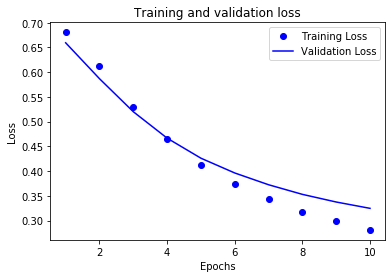

In [16]:
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs=range(1,len(acc)+1)

plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

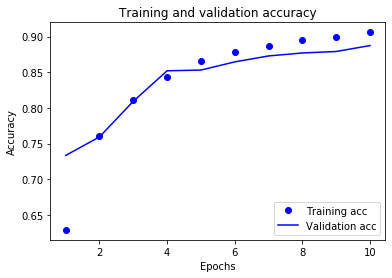

In [17]:
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()